This notebook augments the cleaned data with the NLP topic columns.

In [1]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
from IPython.core.display import display, HTML
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

%reload_ext autoreload
%autoreload 1
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import os
import seaborn as sns
import pandas as pd
import math

from Utils.UtilsGeoViz import *
from Utils.UtilsViz import *
from Utils.DataUtils import *

In [3]:
US_coord = [37.0902, -102]
NY_COORD = [40.7128, -74.0060]

data_path = os.path.join(os.getcwd(), "Data")
ny_datapath = os.path.join(data_path, "NY")

In [9]:
def plot_nans(df):
    nan_df = analyse_nans(df)
    nan_df_transpose = nan_df.T
    nan_df_transpose.sort_values(by="percentage", ascending=False, axis=0, inplace=True)
    f, ax = plt.subplots(1,1, figsize=(30,5))
    plot_bar(data=nan_df_transpose, x=nan_df_transpose.index, y="percentage", 
             ax=ax, annot=True, highlight_max_min=False,
             xlabel="Column", ylabel="Percentage", title="Percentage of NaNs in each column",
            xrot=90)

In [4]:
cleaned_listings = pd.read_csv(os.path.join(ny_datapath, "cleaned_listings.csv"))
kmeans_topics = pd.read_csv(os.path.join(ny_datapath, "kmeans_topics.csv"))

In [5]:
display(kmeans_topics.shape)
kmeans_topics.head()

(39926, 7)

,listing_id,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,2454,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2539,0.000000,0.222222,0.777778,0.000000,0.000000,0.000000
2,2595,0.000000,0.232558,0.302326,0.093023,0.046512,0.325581
3,3330,0.051282,0.102564,0.435897,0.051282,0.051282,0.307692
4,3831,0.004329,0.134199,0.571429,0.121212,0.086580,0.082251


In [14]:
kmeans_topics["listing_id"] = kmeans_topics["listing_id"].astype(int)
kl = kmeans_topics["listing_id"]
cl = cleaned_listings["id"]
find_unique_elems([kl, cl])

[22548780, 29508690, 30460606, 17508710, 28660377]

In [6]:
display(cleaned_listings.shape)
cleaned_listings.head()

(39931, 65)

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verifications_count,desc_len,host_about_len,lreview_year,lreview_month,lreview_day,freview_year,freview_month,freview_day,ndays_between_f_l_reviews,ndays_host,ndays_last_review,num_amenities
0,2454,within a day,60,f,1.0,1.0,t,f,Manhattan,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,137.0,150.0,50.0,1,0.0,7,730,7,7,730,730,7.0,730.0,16,36,65,65,1,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1,0,0,1.00,2,412,0,2019.0,1.0,30.0,2019.0,1.0,30.0,0.0,3803,2.0,15
1,2539,within an hour,100,f,8.0,8.0,t,t,Brooklyn,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,149.0,100.0,25.0,1,25.0,1,730,1,1,730,730,1.0,730.0,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0,5,3,0.23,4,392,431,2018.0,10.0,19.0,2015.0,12.0,4.0,15.0,3800,106.0,44
2,2595,within a day,60,f,5.0,5.0,t,t,Manhattan,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,225.0,350.0,100.0,2,0.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,43,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict,t,t,2,1,0,1,0.38,5,1000,427,2019.0,1.0,2.0,2009.0,11.0,21.0,19.0,3798,31.0,36
3,3330,na,100,f,4.0,4.0,t,t,Brooklyn,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,70.0,150.0,125.0,2,50.0,5,730,5,5,730,730,5.0,730.0,2,27,37,290,39,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,3,0,3,0,0.35,4,1000,25,2018.0,12.0,7.0,2010.0,1.0,4.0,3.0,3737,57.0,25
4,3831,within an hour,96,f,1.0,1.0,t,t,Brooklyn,t,Other,Entire home/apt,3,1.0,1.0,3.0,Real Bed,89.0,500.0,50.0,1,0.0,1,730,1,1,730,730,1.0,730.0,8,11,14,162,231,58,90.0,9.0,9.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1,0,0,4.37,5,1000,46,2019.0,1.0,17.0,2014.0,9.0,30.0,13.0,3709,16.0,31


Join the tables together

In [34]:
combined_table = pd.merge(left=cleaned_listings, right=kmeans_topics, left_on="id", right_on="listing_id", how="right")
if "listing_id" in combined_table.columns:
    combined_table.drop(labels=["listing_id"], axis=1, inplace=True)
display(combined_table.shape)
combined_table.head()

(39926, 71)

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verifications_count,desc_len,host_about_len,lreview_year,lreview_month,lreview_day,freview_year,freview_month,freview_day,ndays_between_f_l_reviews,ndays_host,ndays_last_review,num_amenities,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,2454,within a day,60,f,1.0,1.0,t,f,Manhattan,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,137.0,150.0,50.0,1,0.0,7,730,7,7,730,730,7.0,730.0,16,36,65,65,1,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1,0,0,1.00,2,412,0,2019.0,1.0,30.0,2019.0,1.0,30.0,0.0,3803,2.0,15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,2539,within an hour,100,f,8.0,8.0,t,t,Brooklyn,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,149.0,100.0,25.0,1,25.0,1,730,1,1,730,730,1.0,730.0,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0,5,3,0.23,4,392,431,2018.0,10.0,19.0,2015.0,12.0,4.0,15.0,3800,106.0,44,0.000000,0.222222,0.777778,0.000000,0.000000,0.000000
2,2595,within a day,60,f,5.0,5.0,t,t,Manhattan,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,225.0,350.0,100.0,2,0.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,43,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict,t,t,2,1,0,1,0.38,5,1000,427,2019.0,1.0,2.0,2009.0,11.0,21.0,19.0,3798,31.0,36,0.000000,0.232558,0.302326,0.093023,0.046512,0.325581
3,3330,na,100,f,4.0,4.0,t,t,Brooklyn,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,70.0,150.0,125.0,2,50.0,5,730,5,5,730,730,5.0,730.0,2,27,37,290,39,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,3,0,3,0,0.35,4,1000,25,2018.0,12.0,7.0,2010.0,1.0,4.0,3.0,3737,57.0,25,0.051282,0.102564,0.435897,0.051282,0.051282,0.307692
4,3831,within an hour,96,f,1.0,1.0,t,t,Brooklyn,t,Other,Entire home/apt,3,1.0,1.0,3.0,Real Bed,89.0,500.0,50.0,1,0.0,1,730,1,1,730,730,1.0,730.0,8,11,14,162,231,58,90.0,9.0,9.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1,0,0,4.37,5,1000,46,2019.0,1.0,17.0,2014.0,9.0,30.0,13.0,3709,16.0,31,0.004329,0.134199,0.571429,0.121212,0.086580,0.082251


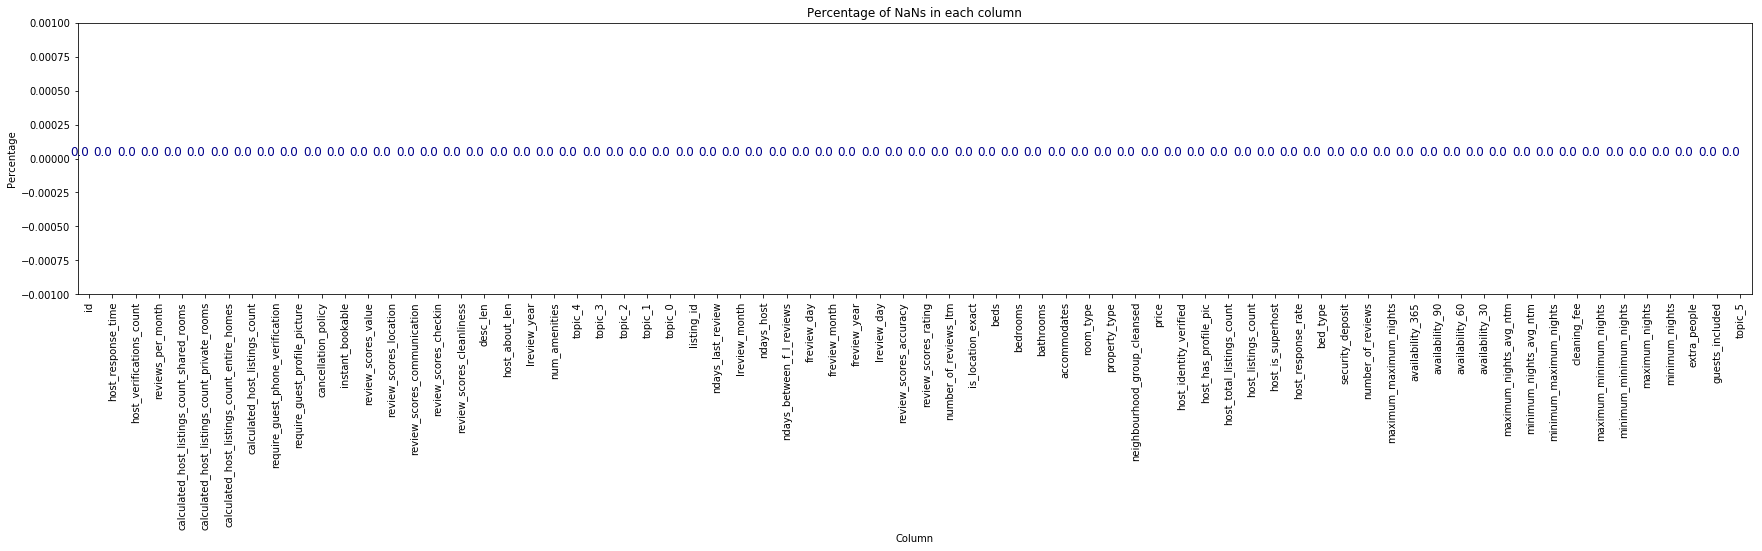

In [29]:
plot_nans(combined_table)

In [36]:
combined_path = os.path.join(ny_datapath, "cleaned_with_nlp_listings.csv")
combined_table.to_csv(combined_path)

# Verify

In [37]:
combtable = pd.read_csv(combined_path)
display(combtable.shape)
combtable.head()

(39926, 72)

,Unnamed: 0,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_verifications_count,desc_len,host_about_len,lreview_year,lreview_month,lreview_day,freview_year,freview_month,freview_day,ndays_between_f_l_reviews,ndays_host,ndays_last_review,num_amenities,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5
0,0,2454,within a day,60,f,1.0,1.0,t,f,Manhattan,t,Condominium,Entire home/apt,2,1.0,0.0,2.0,Real Bed,137.0,150.0,50.0,1,0.0,7,730,7,7,730,730,7.0,730.0,16,36,65,65,1,1,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1,0,0,1.00,2,412,0,2019.0,1.0,30.0,2019.0,1.0,30.0,0.0,3803,2.0,15,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1,2539,within an hour,100,f,8.0,8.0,t,t,Brooklyn,f,Apartment,Private room,4,1.0,1.0,1.0,Real Bed,149.0,100.0,25.0,1,25.0,1,730,1,1,730,730,1.0,730.0,30,60,90,365,9,2,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,8,0,5,3,0.23,4,392,431,2018.0,10.0,19.0,2015.0,12.0,4.0,15.0,3800,106.0,44,0.000000,0.222222,0.777778,0.000000,0.000000,0.000000
2,2,2595,within a day,60,f,5.0,5.0,t,t,Manhattan,f,Apartment,Entire home/apt,2,1.0,0.0,1.0,Real Bed,225.0,350.0,100.0,2,0.0,1,1125,1,1,1125,1125,1.0,1125.0,30,60,90,365,43,14,95.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict,t,t,2,1,0,1,0.38,5,1000,427,2019.0,1.0,2.0,2009.0,11.0,21.0,19.0,3798,31.0,36,0.000000,0.232558,0.302326,0.093023,0.046512,0.325581
3,3,3330,na,100,f,4.0,4.0,t,t,Brooklyn,t,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,70.0,150.0,125.0,2,50.0,5,730,5,5,730,730,5.0,730.0,2,27,37,290,39,12,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,3,0,3,0,0.35,4,1000,25,2018.0,12.0,7.0,2010.0,1.0,4.0,3.0,3737,57.0,25,0.051282,0.102564,0.435897,0.051282,0.051282,0.307692
4,4,3831,within an hour,96,f,1.0,1.0,t,t,Brooklyn,t,Other,Entire home/apt,3,1.0,1.0,3.0,Real Bed,89.0,500.0,50.0,1,0.0,1,730,1,1,730,730,1.0,730.0,8,11,14,162,231,58,90.0,9.0,9.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1,0,0,4.37,5,1000,46,2019.0,1.0,17.0,2014.0,9.0,30.0,13.0,3709,16.0,31,0.004329,0.134199,0.571429,0.121212,0.086580,0.082251


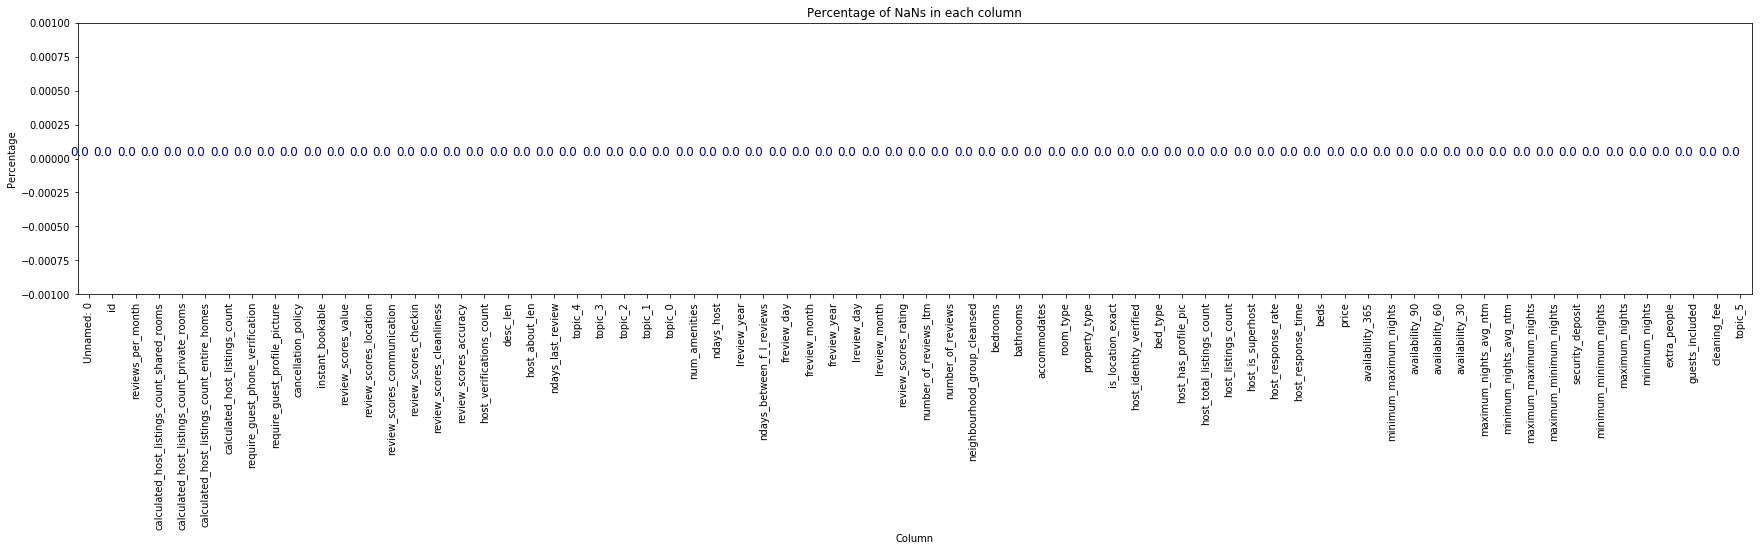

In [38]:
plot_nans(combtable)

In [ ]:
combined_path_2 = os.path.join(ny_datapath, "cleaned_with_nlp_listings_2.csv")
combtable2 = pd.read_csv(combined_path_2)
display(combtable2.shape)
combtable2.head()

In [41]:
find_unique_elems([combtable.columns, combtable2.columns])

['neighbourhood_group_cleansed',
 'neighbourhood_group_cleansed_Staten Island',
 'cancellation_policy_strict',
 'room_type_Shared room',
 'property_type_Other',
 'property_type_Townhouse',
 'bed_type_Futon',
 'host_response_time_within a few hours',
 'neighbourhood_group_cleansed_Queens',
 'host_response_time_within an hour',
 'property_type_House',
 'cancellation_policy',
 'property_type',
 'neighbourhood_group_cleansed_Brooklyn',
 'Unnamed: 0',
 'host_response_time_na',
 'property_type_Condominium',
 'bed_type_Couch',
 'bed_type_Pull-out Sofa',
 'room_type',
 'property_type_Loft',
 'property_type_Serviced apartment',
 'host_response_time_within a day',
 'neighbourhood_group_cleansed_Manhattan',
 'host_response_time',
 'room_type_Private room',
 'bed_type_Real Bed',
 'cancellation_policy_moderate',
 'bed_type']